- Kubernetes is a popular open-source container orchestration platform used to manage and automate the deployment, scaling, and management of containerized applications.

- If you are a Kubernetes user, you have to use manifest files, to define the desired state of your Kubernetes objects. Manifest files allow you to declare the configuration of your application, including the desired replicas, image names, and port mappings, among other things. 

- to define kubernetes manifest file, ome ,ust know YAML or JSON syntax

#### Note: 
In the context of Kubernetes, YAML files are mainly used for the configuration of K8 pods, services, and deployments. In Kubernetes, YAML is a manifest file, which performs the functions mentioned above. They order how a pod should run, interact with other objects, and more. 

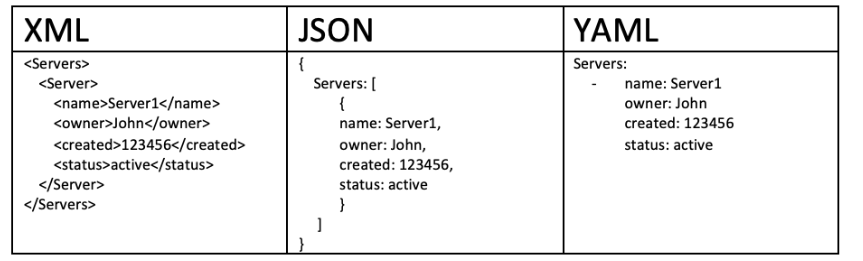

#### YAML Basics:
- It’s difficult to escape YAML if you’re doing anything related to many software fields — particularly Kubernetes, SDN, and OpenStack. 
- YAML, which stands for Yet Another Markup Language, or YAML Ain’t Markup Language (depending who you ask) is a human-readable text-based format for specifying configuration-type information. 
- For example, in this article, we’ll pick apart the YAML definitions for creating first a Pod, and then a Deployment.

#### Defining a Kubernetes Manifest
- When defining a Kubernetes manifest, YAML gives you a number of advantages, including:
- Convenience: You’ll no longer have to add all of your parameters to the command line
- Maintenance: YAML files can be added to source control, such as a Github repository so you can track changes
- Flexibility: You’ll be able to create much more complex structures using YAML than you can on the command line

YAML is a superset of JSON, which means that any valid JSON file is also a valid YAML file. So on the one hand, if you know JSON and you’re only ever going to write your own YAML (as opposed to reading other people’s) you’re all set. 

YAML is relatively easy to learn. There are only two types of structures you need to know about in YAML:
- Lists
- Maps

#### YAML Maps
Let’s start by looking at YAML maps. 

- Maps let you associate name-value pairs, which of course is convenient when you’re trying to set up configuration information. 
- For example, you might have a config file that starts like this:

apiVersion: v1

kind: Pod

The first line is a separator, and is optional unless you’re trying to define multiple structures in a single file. From there, as you can see, we have two values, v1 and Pod, mapped to two keys, apiVersion, and kind.

This kind of thing is pretty simple, of course, and you can think of it in terms of its JSON equivalent:

In [2]:
{

   "apiVersion": "v1",

   "kind": "Pod"

}

{'apiVersion': 'v1', 'kind': 'Pod'}

Notice that in our YAML version, the quotation marks (" ") are optional; the processor can tell that you’re looking at a string based on the formatting.

You can also specify more complicated structures by creating a key that maps to another map, rather than a string, as in:


apiVersion: v1

kind: Pod

metadata:

  name: rss-site

  labels:

    app: web

In [3]:
{

  "apiVersion": "v1",

  "kind": "Pod",

  "metadata": {

               "name": "rss-site",

               "labels": {

                          "app": "web"

                         }

              }

}

{'apiVersion': 'v1',
 'kind': 'Pod',
 'metadata': {'name': 'rss-site', 'labels': {'app': 'web'}}}

So, above was the YAML vs JSON comparison

#### YAML lists
YAML lists are literally a sequence of objects. For example:

args:

  - sleep

  - "1000"

  - message

  - "Bring back Firefly!"

As you can see here, you can have virtually any number of items in a list, which is defined as items that start with a dash (-) indented from the parent. 

below is the example of JSON file for the same:

In [ ]:
{

   "args": ["sleep", "1000", "message", "Bring back Firefly!"]

}

YAML vs JSON


apiVersion: v1

kind: Pod

metadata:

  name: rss-site

  labels:

    app: web

spec:

  containers:

    - name: front-end

      image: nginx

      ports:

        - containerPort: 80

    - name: rss-reader

      image: nickchase/rss-php-nginx:v1

      ports:

        - containerPort: 88

{

  "apiVersion": "v1",

  "kind": "Pod",

  "metadata": {

                "name": "rss-site",

                "labels": {

                            "app": "web" 

                          }

              },

   "spec": {

              "containers": [ 

                              { 

                                "name": "front-end",

                                "image": "nginx",

                                "ports": [

                                           {

                                              "containerPort": "80"

                                           }

                                         ]

                              }, 

                              {

                                "name": "rss-reader",

                                "image": "nickchase/rss-php-nginx:v1",

                                "ports": [

                                           {

                                              "containerPort": "88"

                                           }

                                         ]

                              }

                            ]

           }

}

####  Review of yaml, we have :

- maps, which are groups of name-value pairs
- lists, which are individual items
- maps of maps
- maps of lists
- lists of lists
- lists of mapsin yaml

ref: https://www.mirantis.com/blog/introduction-to-yaml-creating-a-kubernetes-deployment/

Now let's understand what are some common terms in Kubernetes yml.

For managing app with deployment, scaling & updating, this terms are necessary to understand.


apiVersion: v1
kind: Service
metadata:
  name: my-nginx-svc
  labels:
    app: nginx
spec:
  type: LoadBalancer
  ports:
  - port: 80
  selector:
    app: nginx



apiVersion: apps/v1
kind: Deployment
metadata:
  name: my-nginx
  labels:
    app: nginx
spec:
  replicas: 3
  selector:
    matchLabels:
      app: nginx
  template:
    metadata:
      labels:
        app: nginx
    spec:
      containers:
      - name: nginx
        image: nginx:1.14.2
        ports:
        - containerPort: 80


#### apiVersion + Kind

- When we create Kubernetes resource manifests, one of the first important things that we need to specify for the resource is the apiVersion. 
- For many of the common resources, you might be able to “guess” accurately, but it’s a good skill to be able to figure this out in your cluster. The format of the apiVersion is api_group/version.
- An object definition in Kubernetes requires a apiVersion field. When Kubernetes has a release that updates what is available for you to use—changes something in its API—a new apiVersion is created.


--------------------------------------------------------------------------------------------

- In a Kubernetes YAML file, the kind field is a fundamental directive that specifies the type or kind of Kubernetes resource you are defining within the file. This field is crucial because it informs Kubernetes how to interpret and handle the resource described in the YAML configuration.

- The kind directive is used to identify the intended Kubernetes resource type and is used as part of the API version and resource definition. The combination of kind and apiVersion helps Kubernetes understand how to process the YAML file and what kind of object to create, update, or manage within the cluster.

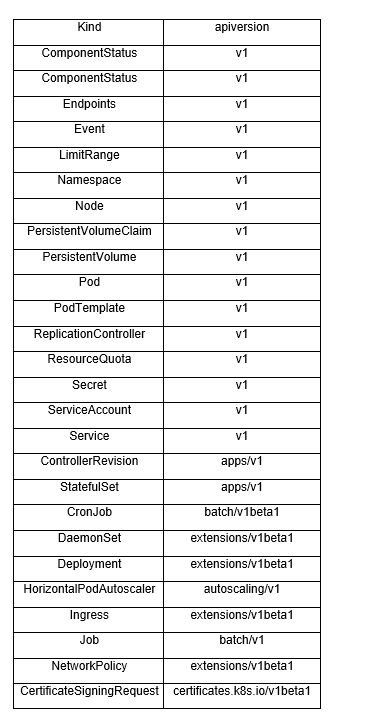

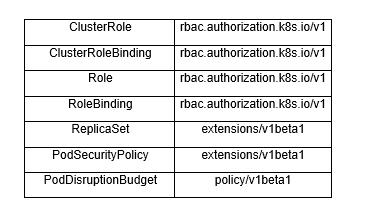

reference:https://blog.knoldus.com/what-is-apiversion-in-kubernetes-part-1/

#### metadata

- Metadata — Information that uniquely identifies the object, such as name or namespace
- After specifying the type of object that’s being defined, the metadata field provides the unique properties for that specific object. 
- This could include the name, labels, uuid, and namespace fields. The values specified for these fields provide us with context for the object, and they can be referred to by other objects. 
- So, this field allows us to specify the identifier properties of the object.

#### spec

- The spec field allows us to define what’s expected from the object that we’re building. 
- It consists of all the key-value pairs specific to defining the operation of the object. 
- Just like the object itself, the specifications of the object depend on the apiVersions specified before. 
- Hence, different APIVersions may include the same object, but the specifications of the object that can be defined will probably differ.

#### Labels:

- labels are key-value pairs are attached to the objects [pods, deployemnts, Namespaces]
- it will give you the addition information about the object 

Label Selectors: 

1. eqaulity based selector 
2. set based selector 
 exist / not exist 

Now let's come back to Kind in kubernetes manifest:


Some most important kind are:
- service
- pod
- deployment
- configmap
- secret
- ingress
- volume
- replication controller

#### Service:

In Kubernetes, a Service is a method for exposing a network application that is running as one or more Pods in your cluster.

#### Why Services in Kubernetes?
- In Kubernetes, each Pod gets its own internal IP address, but Pods are ephemeral (not constant). Pods are frequently created and destroyed, causing their IP addresses to change constantly.
- Non-functioning pods get replaced by new ones automatically. Meaning that when old Pod dies and new one gets started in its place it gets a new IP address. So it doesn’t make sense to use Pod IP addresses directly, because then you would have to adjust that every time the Pod gets recreated. It will create discoverability issues for the deployed application in pods, and making it difficult to identify which pods to connect.
- With the Service component you have a solution of a stable or static IP address that stays even when the Pod is destroyed. Basically we set a Service in front of each Pod, which represents a stable IP address. So clients can call a single stable IP address instead of calling each Pod individually.

    There are different Type service 
    1. Cluster IP address >> Accessible within the cluster 
    2. NodePort >> Expose the port of Node 
    3. LoadBalancer >> It will route the traffic based on request 
    4. ExternaName >> map the service to CNAME. 

1. Cluster IP address:
- ClusterIP Services are used for communication between Pods within the same Kubernetes cluster.

- The Service gets exposed on a static IP that's unique within the cluster. 

- When you make a request to that IP, the Service takes care of redirecting traffic to one of the Pods it's associated with. And if there's more than one Pod, the Service will automatically balance the traffic, so no single Pod gets bogged down by too many requests.

- Note that ClusterIP Services are meant for Pod-to-Pod communication only. They aren't accessible from outside the cluster.

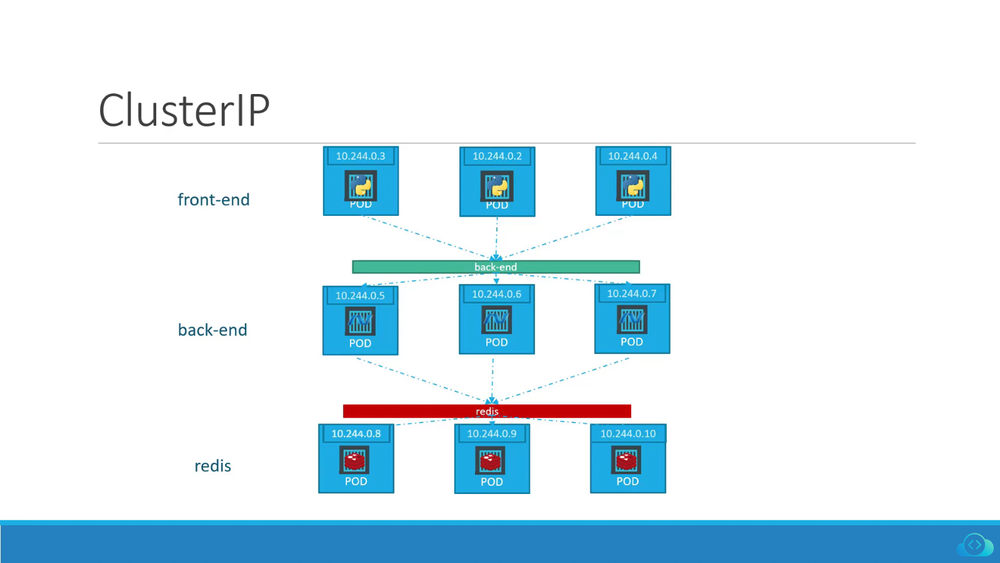

the green one is cluster ip address services.


apiVersion: v1
kind: Service
metadata:
 name: nginx-clusterip
spec:
 type: ClusterIP
 selector:
   run: app-nginx
 ports:
 - port: 80
   protocol: TCP

- kind: Specifies the type of Kubernetes object that is being defined. Here we are defining a Service.
- name: Specifies the name of the Service, in this case, "nginx-clusterip".
- type: Specifies the type of Service, in this case, a ClusterIP Service.
- selector: Specifies a label selector that defines which Pods should be exposed by this Service. In this example, the Service will expose all Pods that have the label "run" with the value "app-nginx". It's a way of telling Kubernetes: "This Service should sit 'in front' of this collection of Pods. All incoming traffic to this Service should be redirected to one of these Pods."
- port: Specifies the network port that the Service should expose. In this example, the Service exposes port 80.

2. NodePort Service

- The NodePort Service is useful when you need to expose your application to external clients. This means all traffic that is coming from outside of the cluster.

- When you create a NodePort Service, Kubernetes opens a port (in the range of 30000 and 32767) on all of its worker nodes. Note that the same port number is used across all of them. All traffic incoming to the worker node's IP address, and that specific port, is redirected to a Pod linked with that Service.

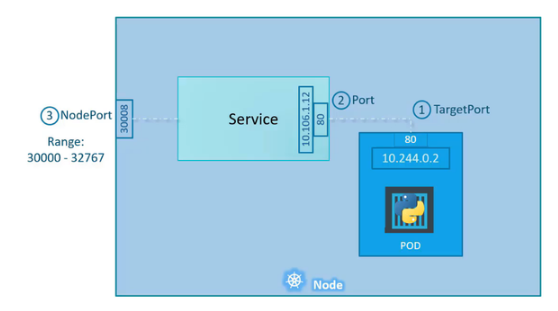

- Keep in mind that a NodePort Service doesn't do any kind of load balancing across multiple nodes. All the incoming traffic goes straight to the node that the external client is connected to. This can result in some nodes getting hit hard with traffic while others are barely used.

apiVersion: v1
kind: Service
metadata:
 name: nginx-nodeport
spec:
 type: NodePort
 selector:
   run: app-nginx
 ports:
 - nodePort: 30001
   port: 80
   targetPort: 80

In the "ports" block, we have defined three ports:

- nodePort: Tells Kubernetes which port to "open" to the outside world on all of the worker nodes. This makes them accept incoming connections, from outside the cluster, on the port we chose here, 30001.

- port: Specifies the port that should be "open" to the cluster, internally. Incoming connections will be accepted on this port, only if they come from within the cluster. External connections won't be accepted on this port.

- targetPort: The Service will forward incoming connections to one of the Pods it exposes. "targetPort" specifies on which port of the Pod to send traffic to. E.g., with this config, even if traffic comes to port 30001 on the node, it will be sent to port 80 of the Pod (the "targetPort").

3. LoadBalancer Service

- A LoadBalancer Service is another way you can expose your application to external clients. However, it only works when you're using Kubernetes on a cloud platform that supports this Service type.
- The LoadBalancer Service detects the cloud computing platform on which the cluster is running and creates an appropriate load balancer in the cloud provider’s infrastructure. 
- The load balancer will have its own unique, publicly accessible IP address. For example, if the cluster is running on Amazon Web Services (AWS), the Service will create an Elastic Load Balancer (ELB) to distribute incoming traffic across multiple nodes in the cluster.

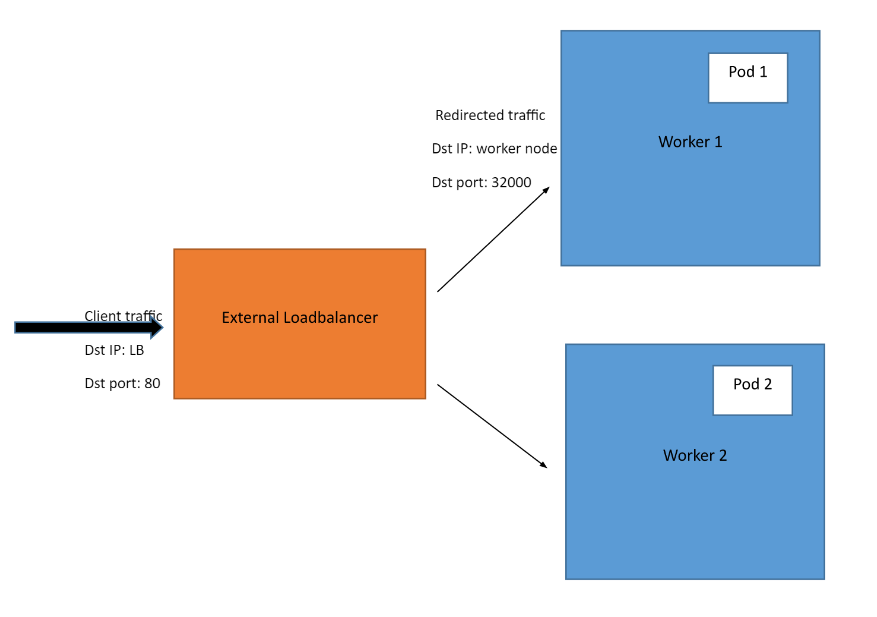

- For example, say you have a web application running on a Kubernetes cluster and exposed using the LoadBalancer Service. External users can access the application by visiting the external IP address of the load balancer in their web browser.
- The load balancer will then forward their request to a node. If another user connects, their connection will be forwarded to a different node. This way, traffic gets distributed evenly, across multiple nodes, so that none gets overloaded with too many requests. 
- Finally, the connection gets forwarded from node to Pod through a Service that sits in front of them. Each user will then get the response in their web browser. But users won't hit the same node, because of our LoadBalancer. So our worker nodes will have an easier time responding to requests.

In [ ]:
apiVersion: v1
kind: Service
metadata:
 name: nginx-load-balancer
spec:
 type: LoadBalancer
 selector:
   run: app-nginx
 ports:
 - port: 80
   targetPort: 80

This LoadBalancer Service will be named "nginx-load-balancer". The traffic it receives on port: 80 will be sent to one of the Pods labeled run: app-nginx, on targetPort: 80 of those Pods.

4. ExternalName Service

- An ExternalName Service in Kubernetes is useful when you have a service that is running outside your Kubernetes cluster, such as a database, and you want to access it from within your cluster.

- For example, let's say you have an app in a Pod that needs to access an external database running at the domain name "db-prod.example.com". For this database, you can create an ExternalName Service named, say, "db-prod". Then, when the app wants to connect to the database, it will send a request to the local name "db-prod". Next, Kubernetes will look up the ExternalName Service for "db-prod" and see that it has an external name of "db-prod.example.com". Kubernetes will then use DNS to resolve the external name to an IP address and route the request to the appropriate external service outside the Kubernetes cluster. This process happens automatically and seamlessly. The app doesn’t need to be aware of the details of the external service.



In [ ]:
apiVersion: v1
kind: Service
metadata:
 name: db-prod
spec:
 type: ExternalName
 externalName: db-prod.example.com 

The following is an explanation of the key fields:

- name: This field specifies the name of the Service object, in this case, "db-prod".
- type: This field specifies the type of Service. In this case, the value is "ExternalName", indicating that this Service maps to an external service, not a service inside the Kubernetes cluster.
- externalName: This field specifies the location at which that external service can be reached at, in this case, "db-prod.example.com".


#### Conclusion
Kubernetes Services help us connect all of the components we have running on our Pods. They provide a stable front gate, where Pods can be reached at, allowing for reliable communication both within the cluster and between the cluster and external clients

ref: https://kodekloud.com/blog/kubernetes-services/
https://www.bmc.com/blogs/kubernetes-services/

## Deployment

- Everyone running applications on Kubernetes cluster uses a deployment.
- It’s what you use to scale, roll out, and roll back versions of your applications.
- With a deployment, you tell Kubernetes how many copies of a Pod you want running.The deployment takes care of everything else.

#### What is a Deployment?
- A deployment is an object in Kubernetes that lets you manage a set of identical pods.
- Without a deployment, you’d need to create, update, and delete a bunch of pods manually.
- With a deployment, you declare a single object in a YAML file. This object is responsible for creating the pods, making sure they stay up to date, and ensuring there are enough of them running
- You can also easily autoscale your applications using a Kubernetes deployment.

In [ ]:
kind: Deployment
apiVersion: extensions/v1beta1
metadata:
  name: nginx-deployment
spec:
  # A deployment's specification really only 
  # has a few useful options
  
  # 1. How many copies of each pod do we want?
  replicas: 3

  # 2. How do want to update the pods?
  strategy: Recreate

  # 3. Which pods are managed by this deployment?
  selector:
    # This must match the labels we set on the pod!
    matchLabels:
      deploy: example
  
  # This template field is a regular pod configuration 
  # nested inside the deployment spec
  template:
    metadata:
      # Set labels on the pod.
      # This is used in the deployment selector.
      labels:
        deploy: example
    spec:
      containers:
        - name: nginx
          image: nginx:1.7.9

##### Deployment vs service:

- A deployment is used to keep a set of pods running by creating pods from a template.
- A service is used to allow network access to a set of pods.
- Both services and deployments choose which pods they operate on using labels and label selectors. This is where the overlap is.
- You can use deployments independent of services. You can use services independent of deployments.
- https://matthewpalmer.net/kubernetes-app-developer/articles/kubernetes-deployment-tutorial-example-yaml.html

## ConfigMap

- In programming, we use env files or separate configuration files to store settings, configurations, or variables that are required to execute the program. In Kubernetes, we can use ConfigMaps to achieve the same functionality.

#### What is a ConfigMap?

A ConfigMap is a Kubernetes API object that can be used to store data as key-value pairs. Kubernetes pods can use the created ConfigMaps as a:
1. Configuration file
2. Environment variable
3. Command-line argument
- ConfigMaps provides the ability to make applications portable by decoupling environment-specific configurations from the containers.
- Importantly, ConfigMaps are not suitable for storing confidential data. They do not provide any kind of encryption, and all the data in them are visible to anyone who has access to the file. (Kubernetes provides secrets that can be used to store sensitive information.)
- Another consideration of ConfigMaps is the size of the file, as we are trying to store application configuration ConfigMap files limited to 1MB. For larger data sets, it’s better to use separate file mounts, databases, or file services.

In [ ]:
kind: ConfigMap
apiVersion: v1
metadata:
name: example-configmap
namespace: default
data:
# Configuration Values are stored as key-value pairs
system.data.name: "app-name"
system.data.url: "https://app-name.com"
system.data.type_one: "app-type-xxx"
system.data.value: "3"
# File like Keys
system.interface.properties: |
ui.type=2
ui.color1=red
ui.color2=green

ref: https://www.bmc.com/blogs/kubernetes-configmap/

## Kubernetes Secrets

- Kubernetes Secrets are built-in objects that enable you to store and manage sensitive information securely. 
- They provide a convenient way to distribute confidential data to containers and maintain the separation of concerns between the application and its credentials.

Creating Kubernetes Secrets
There are several ways to create Kubernetes Secrets:
1. Using kubectl
2. Using a configuration file
3. Using the Kustomize tool

In [ ]:
apiVersion: v1
kind: Secret
metadata:
  name: my-secret
data:
  username: bXl1c2Vy
  password: bXlwYXNzd29yZA==

#### Ways to employ secrets within Pods
Secrets can be used within Pods in the following ways:

- Mounting secrets as files in a volume for containers: You can mount a secret as a volume inside a container. Each key-value pair in secret will be presented as a separate file within the mounted volume.
- Setting secrets as container environment variables: Secrets can be exposed as environment variables in containers. This approach allows your application to read the secret value without changing the code, making it more secure and manageable.
- Leveraging kubelet for image pulling with secrets: Kubelet can use secrets to pull container images from private registries. By specifying the secret in the Pod's imagePullSecrets field, Kubernetes will authenticate to the registry using the provided credentials. 
- ref: https://blog.gitguardian.com/how-to-handle-secrets-in-kubernetes/


#### Secrets vs ConfigMap

- Kubernetes secrets are used to store information in encrypted form . So that even if is any unauthorised access is made the attacker is not able to do anything as he needs decryption key . They are used to store sensitive information.
- Kubernetes Config Maps are used store non confidential info in key value store . Pods may use them cli, env variables.

## Ingress

- An API object that manages external access to the services in a cluster, typically HTTP.
- Ingress is an API object that manages external access to services in a Kubernetes cluster
- Using ingress gives us the ability to access our services in our Kubernetes cluster.

- It is an alternative to using the Service object in Kubernetes. It is more secure because there are no ports exposed externally for the user to use for accessing our application.
- There are two key components to understand when it comes to implementing Ingress in a cluster. They are:
1. Ingress Object
2. Ingress Controller

- Ingress Object: an Ingress Object is a resource that defines the rules for routing external traffic to services within the cluster. It defines the routing rules which handle how external requests get routed to internal services.

- Request protocols (HTTP and HTTPS) are also defined when creating your ingress object. An Ingress Object is basically the manifest file for creating an Ingress resource in a Kubernetes cluster.

In [ ]:
Here is an example of what an Ingress Object looks like:

apiVersion: networking.k8s.io/v1
kind: Ingress
metadata:
  name: ingress-object
spec:
  rules:
  - host: mydomain.com
    http:
      paths:
      - path: /app1
        pathType: Prefix
        backend:
          service:
            name: app1-service
            port:
              name: http
      - path: /app2
        pathType: Prefix
        backend:
          service:
            name: app2-service
            port:
              name: http

In this example, we gave our ingress object the name ingress-object.

We can also see that under the rules, we have some things defined, such as:

- host: the host holds a valid domain name to which our requests will be routed.
- http: http defines the paths, services and ports we are mapping any other request with any specified paths defined in the paths parameter.
- Note: this can also be an https protocol if you have SSL configured in your Kubernetes Cluster. 

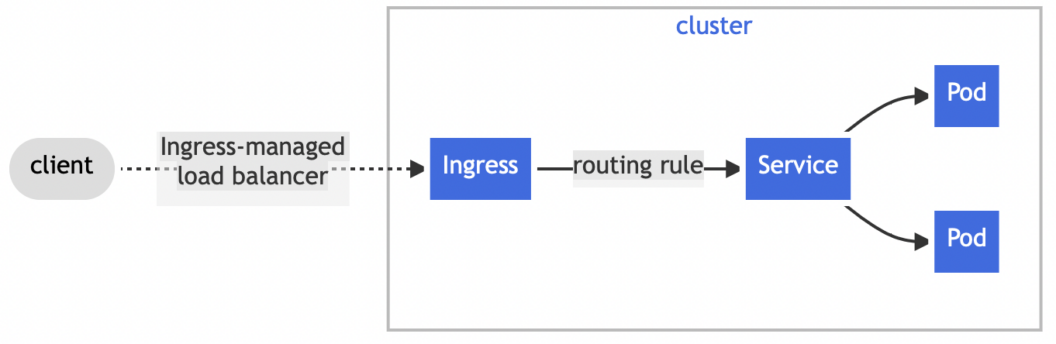

- Ingress Controller: An Ingress Controller is a significant component of a Kubernetes Cluster.

- It serves as the gateway for incoming requests from outside the cluster. The Ingress Controller can also perform a variety of tasks such as Load Balancing, authentication and authorization, etc.

- Some examples of Ingress controllers include Nginx, Traefik, etc

- ref: https://semaphoreci.com/blog/kubernetes-ingress

## Volume

- A Kubernetes volume is a directory containing data, which can be accessed by containers in a Kubernetes pod. 
- The location of the directory, the storage media that supports it, and its contents, depend on the specific type of volume being used.Processes running within containers in a pod see a file system view composed of:A root file system that matches the content of the container image.
- Volumes mounted on the container (if defined). Each volume mounts on a specific path within the container file system.Volumes are defined in the .spec.containers[*].volumeMounts field of the pod template
- For each pod and each container image within the pod, you need to specify which volumes it will mount and on which paths (the paths can be different for each container).
- There are a few types of volumes in Kubernetes. The most important are ephemeral volumes, which are stored locally on the Kubernetes node and are deleted when a pod restarts, and Kubernetes persistent volumes (PV) which retain data even after a pod shuts down.

Types of Kubernetes Volumes:
1. Persistent Volumes
2. Ephemeral Volumes
3. EmptyDir Volumes
4. Kubernetes hostPath Volumes
5. Kubernetes Volumes ConfigMap

In [ ]:
spec:
  containers:
 —name: my-app
    image: nginx
    volumeMounts:
   —name: my-volume
      mountPath: /app/config
  volumes:
 —name: my-volume

ref: https://bluexp.netapp.com/blog/cvo-blg-5-types-of-kubernetes-volumes-and-how-to-work-with-them

## Replication:

- Typically we want to replicate our containers i.e. our application for several reasons which include reliability, load balancing, and scaling. 
- By having multiple versions of the application we prevent problems if one or more pods fail.
- So, load balancing by having multiple versions of the containers enables us to easily send traffic to different instances to prevent overloading a single instance or not. 
- This is something that Kubernetes does but the box scaling benefit is, when the load becomes too much for a number of existing instances, Kubernetes enables it to easily scale up the application adding additional instances as needed.
- Replication is appropriate for numerous use cases which include microservices-based applications, cloud-native applications, or else mobile backends.

#### Replication Controller:

- The Replication Controller is the original form of Replication in Kubernetes. 
- It is been replaced by Replica sets. But, as the Replication Controller is widely used it is worth understanding what is it and how it works.
- The Replication Controller is a structure that enables us to easily create multiple pods. 
- If we make sure that a number of pods always exists. If a pod crashes, the Replication Controller replaces it with a new pod. The Replication Controller also provides other benefits such as the ability to scale the number of pods and to update or delete multiple pods with a single command.

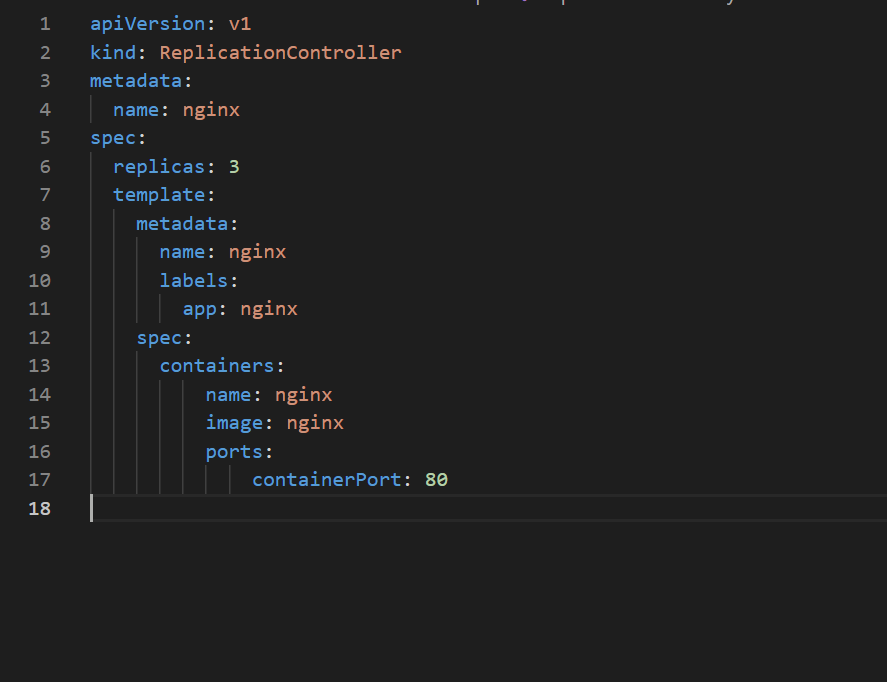

- So, here we will provide the name for the Replication Controller and under the spec, we will be defining how many replicas we want from the given pod definition under the template section. 
- Under the template section, we will be providing the exact details that we have provided in a pod definition yml file that will include metadata labels and under the spec, we can define containers, init containers, different images, ports, different configmap volume mounts, environment variables all of those configurations basically related to pods we can provide it under the template section.
- The Replication Controller can have an optional selector and spec, where we can provide the labels used in the pods which is used to label query over the pods that should match with the replica count. When the selector is not provided it will assume that the provided template labels will be used as the selector.

#### Replica Sets:

- Replica Sets are declared in the same way as Replication Controller except that they have more options for the selectors.
- The Selector is mandatory for Replica sets as match labels you can provide the pod labels to query the pods to match with the replica count.

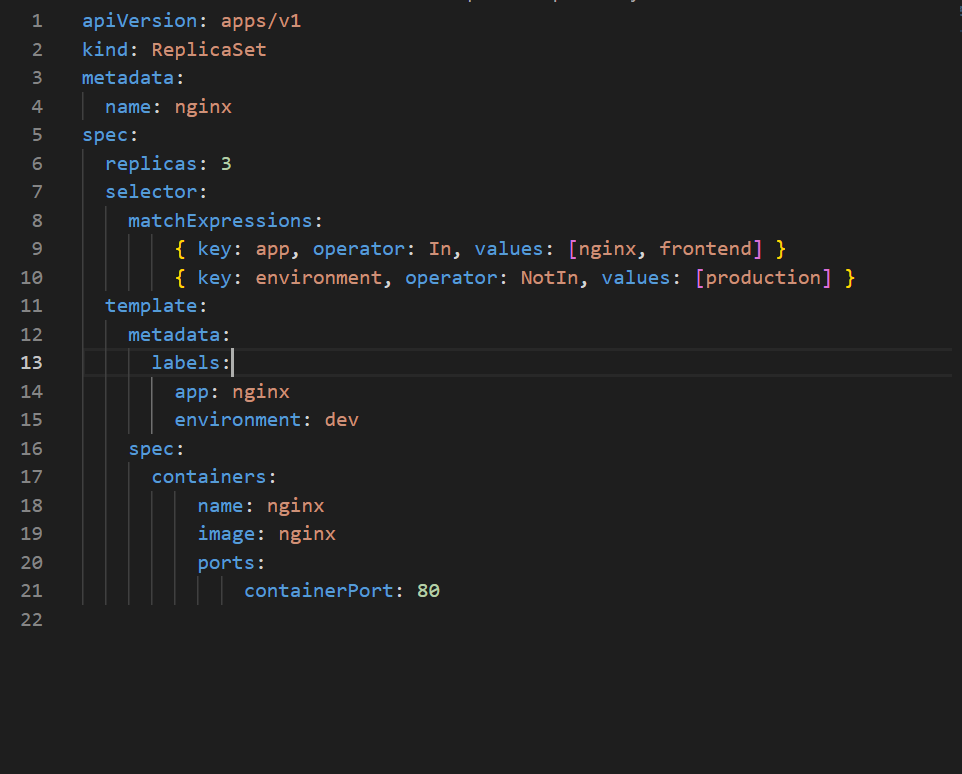

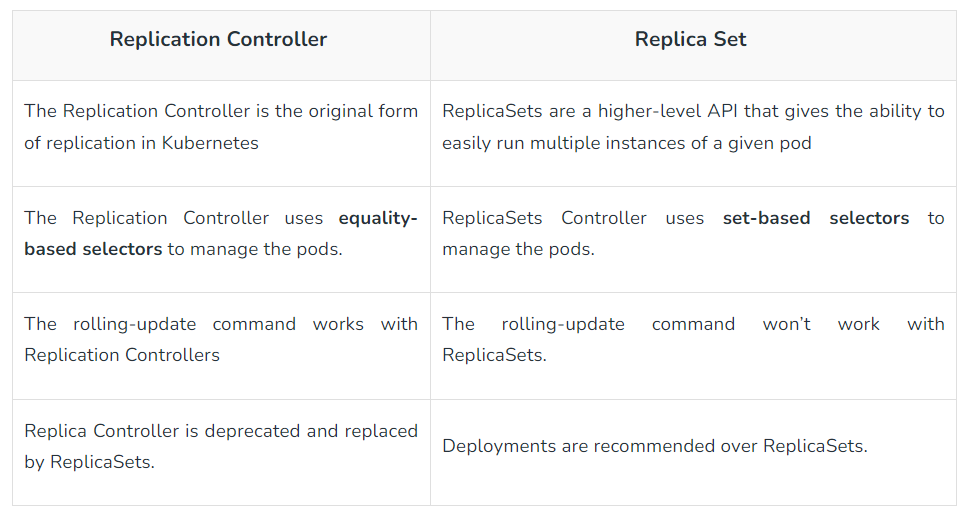

## Namespaces:

- A Kubernetes namespace helps separate a cluster into logical units.
- It helps granularly organize, allocate, manage, and secure cluster resources. 
- namespace are the sub cluster from kubernetes cluster
- if multiple users and team use the same cluster to separate the changes 

Here are two notable use cases for Kubernetes namespaces:

- Apply policies to cluster segments—Kubernetes namespaces let you apply policies to different parts of a cluster. For example, you can define resource policies to limit resource consumption. You can also use container network interfaces (CNIs) to apply network policies that define how communication is achieved between pods in each namespace. Learn more about Kubernetes networking.

- Apply access controls—namespaces let you define role-based access control (RBAC). You can define a role object type and assign it using role binding. The role you define is applied to a namespace, and RoleBinding is applied to specific objects within this namespace. Using this technique can help you improve the security of your cluster.

In a new cluster, 

Kubernetes automatically creates the following namespaces: 
- default (for user workloads) and 
- three namespaces for the Kubernetes control plane: kube-node-lease, kube-public, and kube-system. 
- Kubernetes also allows admins to manually create custom namespaces.

Default Kubernetes namespaces

Here are the four default namespaces Kubernetes creates automatically:

- default—a default space for objects that do not have a specified namespace.
- kube-system—a default space for Kubernetes system objects, such as kube-dns and kube-proxy, and add-ons providing cluster-level features, such as web UI dashboards, ingresses, and cluster-level logging.
- kube-public—a default space for resources available to all users without authentication.
- kube-node-lease—a default space for objects related to cluster scaling.

Custom Kubernetes namespaces

Admins can create as many Kubernetes namespaces as necessary to isolate workloads or resources and limit access to specific users. Here is how to create a namespace using kubectl:

kubectl create ns mynamespace



In [ ]:
kind: Namespace
apiVersion: v1
metadata:
  name: mynamespace
  labels:
    name: mynamespace
kubectl apply -f test.yaml

ref: https://www.aquasec.com/cloud-native-academy/kubernetes-101/kubernetes-namespace/

## What Are Stateful Applications?
- Stateful applications are applications that store data and keep tracking it. 
- All databases, such as MySQL, Oracle, and PostgreSQL, are examples of stateful applications. 
- Stateless applications, on the other hand, do not keep the data. Node.js and Nginx are examples of stateless applications, For each request, the stateless application will receive new data and process it.

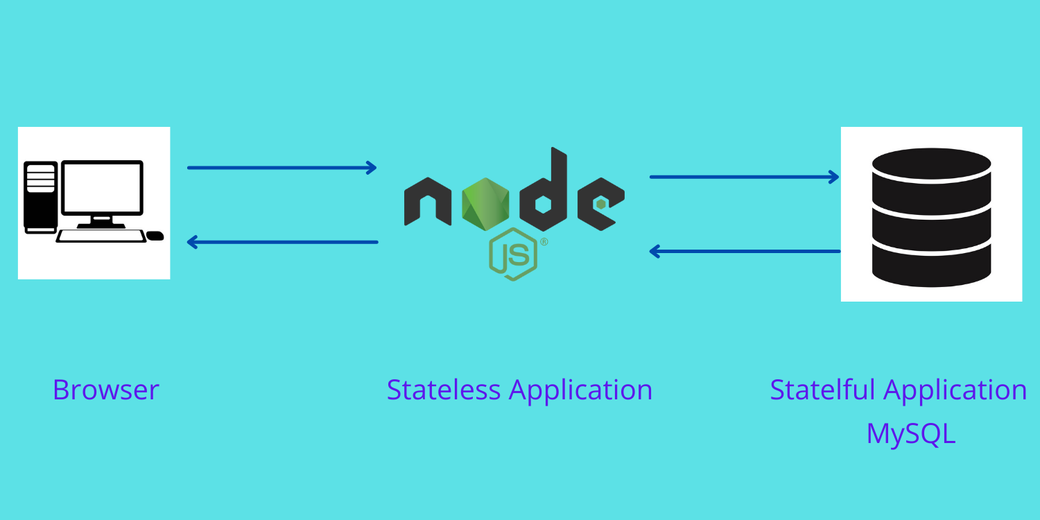

#### What Are StatefulSets?

- A StatefulSet is the Kubernetes controller used to run the stateful application as containers (Pods) in the Kubernetes cluster. 
- StatefulSets assign a sticky identity—an ordinal number starting from zero—to each Pod instead of assigning random IDs for each replica Pod.
- A new Pod is created by cloning the previous Pod’s data. 
- If the previous Pod is in the pending state, then the new Pod will not be created. 
- If you delete a Pod, it will delete the Pod in reverse order, not in random order. 
- For example, if you had four replicas and you scaled down to three, it will delete the Pod numbered 3.

Note: Pod lifecycle

- A pod status tells us where the pod is in its lifecycle. 
- It is meant to give you an idea not for certain, therefore It is good practice to debug if pod does not come up cleanly. 

The five phases of a pod lifecycle are:

1. Pending: The pod is accepted, but at least one container image has not been created.
2. Running: The pod is bound to a node, and all containers are created. One container is running or in the process of starting or restarting.
3. Succeeded
4. Failed
5. Unknown: The state of the pod couldn’t be obtained.

ref: https://loft.sh/blog/kubernetes-statefulset-examples-and-best-practices/